In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from sklearn.datasets import make_circles, make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from spectral_clustering import *
from parameter_fitting import *

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from pydiffmap import diffusion_map as dm

# Shared color maps for presentation-friendly styling
PRESENTATION_CMAP = ListedColormap(PRESENTATION_COLORS)
TWO_CLUSTER_CMAP = ListedColormap(PRESENTATION_COLORS[:2])

In [3]:
import warnings

warnings.filterwarnings(
    "ignore", message="KMeans is known to have a memory leak on Windows with MKL"
)

In [4]:
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

In [5]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
gmm = GaussianMixture(n_components=2, random_state=42)

y_kmeans = kmeans.fit_predict(X)
y_gmm = gmm.fit_predict(X)

In [6]:
distance_matrix = get_distance_matrix_from_data(X)
similarity_matrix = get_similarity_matrix_from_distance_matrix(
    distance_matrix, sim_graph_type="knn"
)

spectral_clustering = Spectral_Clustering(W=similarity_matrix, K=2)
y_spectral = spectral_clustering.labels

# Intro

Motivation and example when spectral clustering is better than GMM and K-Means

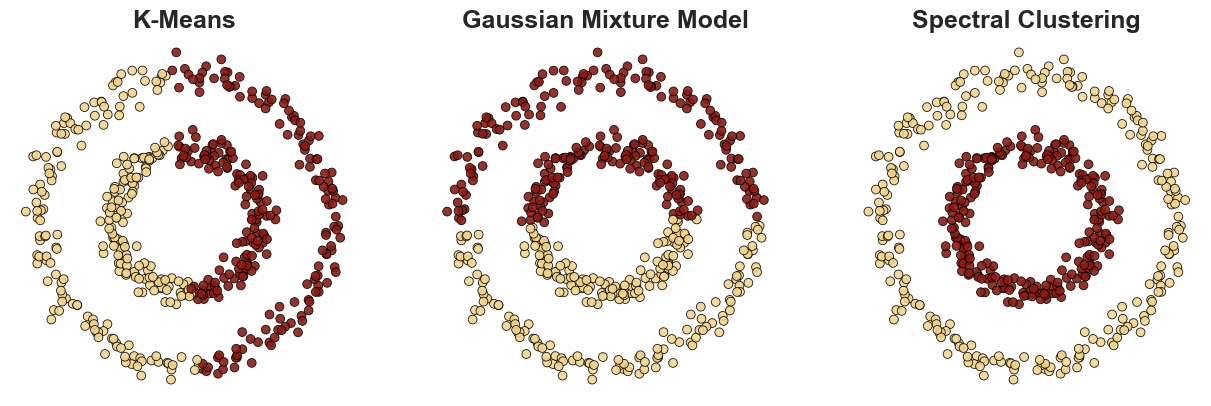

In [7]:
sns.set_theme(style="white", context="talk")
fig, axes = plt.subplots(1, 3, figsize=(16, 4.5), sharex=True, sharey=True)
methods = [
    ("K-Means", y_kmeans),
    ("Gaussian Mixture Model", y_gmm),
    ("Spectral Clustering", y_spectral),
]
for ax, (title, labels) in zip(axes, methods):
    ax.scatter(
        X[:, 0],
        X[:, 1],
        c=labels,
        cmap=TWO_CLUSTER_CMAP,
        s=40,
        linewidths=0.6,
        edgecolor="black",
        alpha=0.9,
    )
    ax.set_title(title, fontweight="semibold")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(False)

fig.subplots_adjust(wspace=0.06, top=0.85, bottom=0.05)
plt.show()

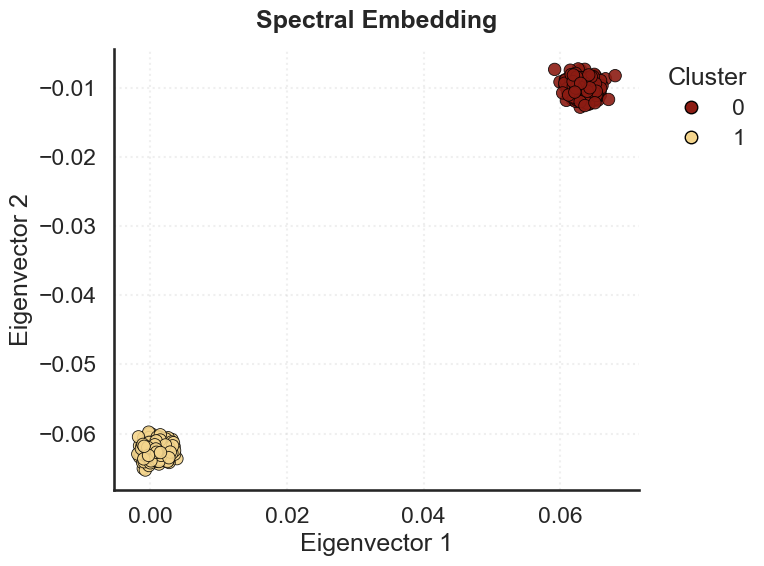

In [8]:
spectral_embedding = spectral_clustering.eigenvectors

plot_2d_spectral_embedding(spectral_embedding, y_spectral)

# Parameter choice

In [22]:
n_samples_circles = 800
n_samples_blob = 100

X_circles, y_circles = make_circles(
    n_samples=n_samples_circles, factor=0.5, noise=0.05, random_state=42
)

# Part B: Satellite Blob (Label 2)
# We place it at (2.5, 2.5) to be clearly distinct but "tempting" for GMM
X_blob, y_blob = make_blobs(
    n_samples=n_samples_blob, centers=[[1.2, 1.2]], cluster_std=0.1, random_state=42
)
# Adjust blob labels to be '2' instead of '0'
y_blob[:] = 2

# Combine Data
X = np.vstack((X_circles, X_blob))
y_true = np.hstack((y_circles, y_blob))  #


# Connecting blob
transformation = [[1.8, 1.5], [1.5, 0.5]]

X_blob, y_blob = make_blobs(
    n_samples=50, centers=[[0.9, -0.5]], cluster_std=0.05, random_state=42
)
# Adjust blob labels to be '2' instead of '0'
y_blob[:] = 3

X_blob = np.dot(X_blob, transformation)

X = np.vstack((X, X_blob))
y_true = np.hstack((y_true, y_blob))  #

In [23]:
# X_ring, _ = make_circles(n_samples=200, factor=0.5, noise=0.03, random_state=1)
# # Keep only outer ring (filter based on radius)
# X_ring = X_ring[X_ring[:, 0] ** 2 + X_ring[:, 1] ** 2 > 0.6]

# X_blob, _ = make_blobs(
#     n_samples=300, centers=[[0, 0]], cluster_std=0.15, random_state=1
# )

# X = np.vstack([X_ring, X_blob])

# # We assign label 0 to the Ring points and label 1 to the Blob points
# y_true = np.concatenate(
#     [
#         np.zeros(X_ring.shape[0]),  # 0s for the ring
#         np.ones(X_blob.shape[0]),  # 1s for the blob
#     ]
# ).astype(int)

In [42]:
K = 4

parameter_grid_knn = {
    "sim_graph_type": ["knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [5, 8, 10, 15, 20, 30, 40],
    "mutual_knn": [0],
    "epsilon": [0],
}

In [43]:
distance_matrix = get_distance_matrix_from_data(X)

In [44]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=1
)
print(best_params_knn)

{'K': 50, 'epsilon': 0, 'knn': 5, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0
Average eigenvalue:  -1.2652174156913634e-15
Estimated K:  2

Average eigenvalue:  -1.2652174156913634e-15
Estimated K:  2

{'K': 50, 'epsilon': 0, 'knn': 8, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 8, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 10, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 10, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 15, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 15, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 20, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 20, 'mutu

In [45]:
similarity_matrix = get_similarity_matrix_from_distance_matrix(
    distance_matrix, sim_graph_type="knn", knn=best_params_knn["knn"]
)

spectral_clustering = Spectral_Clustering(W=similarity_matrix, K=4)

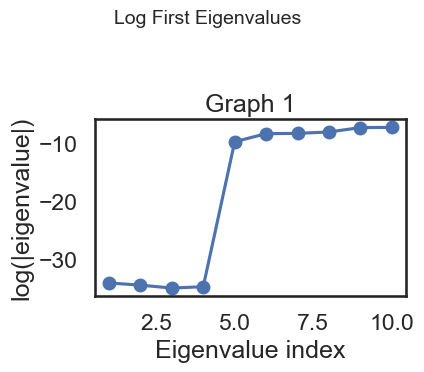

In [46]:
plot_eigenvalues([spectral_clustering.eigenvalues])

In [47]:
kmeans = KMeans(n_clusters=K, random_state=1, n_init=10)
gmm = GaussianMixture(n_components=K, random_state=1)

y_kmeans = kmeans.fit_predict(X)
y_gmm = gmm.fit_predict(X)

In [48]:
spectral_clustering.eigenvalues[0:K].shape

(4,)

In [49]:
y_pred_dmap = diffusion_map(
    spectral_clustering.eigenvectors, spectral_clustering.eigenvalues[0:K], t=2
)

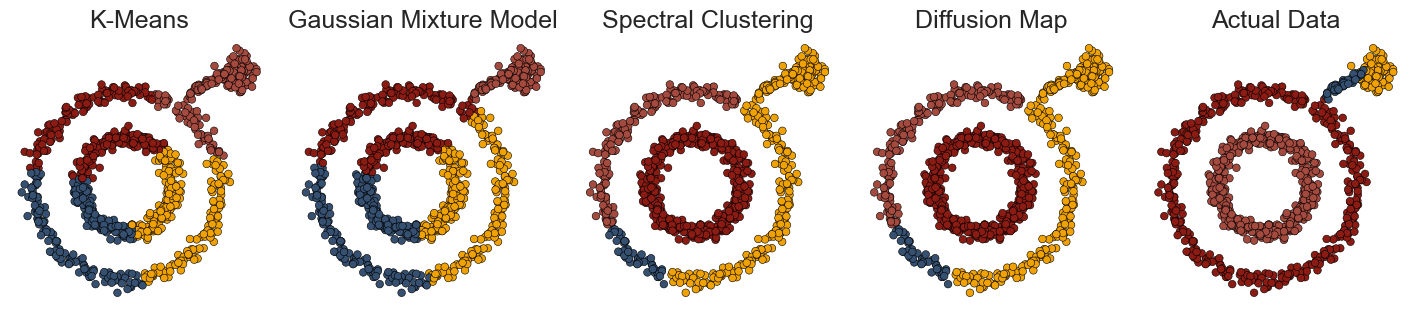

In [50]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
multi_cluster_cmap = PRESENTATION_CMAP

# Plot K-Means
axes[0].scatter(
    X[:, 0],
    X[:, 1],
    c=y_kmeans,
    cmap=multi_cluster_cmap,
    s=30,
    edgecolor="black",
    linewidths=0.4,
)
axes[0].set_title("K-Means")

# Plot GMM
axes[1].scatter(
    X[:, 0],
    X[:, 1],
    c=y_gmm,
    cmap=multi_cluster_cmap,
    s=30,
    edgecolor="black",
    linewidths=0.4,
)
axes[1].set_title("Gaussian Mixture Model")

# Plot Spectral
axes[2].scatter(
    X[:, 0],
    X[:, 1],
    c=spectral_clustering.labels,
    cmap=multi_cluster_cmap,
    s=30,
    edgecolor="black",
    linewidths=0.4,
)
axes[2].set_title("Spectral Clustering")

# Plot Spectral
axes[3].scatter(
    X[:, 0],
    X[:, 1],
    c=y_pred_dmap,
    cmap=multi_cluster_cmap,
    s=30,
    edgecolor="black",
    linewidths=0.4,
)
axes[3].set_title("Diffusion Map")

# Plot
axes[4].scatter(
    X[:, 0],
    X[:, 1],
    c=y_true,
    cmap=multi_cluster_cmap,
    s=30,
    edgecolor="black",
    linewidths=0.4,
)
axes[4].set_title("Actual Data")

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    for spine in ax.spines.values():
        spine.set_visible(False)

fig.subplots_adjust(wspace=0.1, bottom=0.08, top=0.88)
plt.show()